# Is adopting a healthier lifestyle a long-term social change?

### EPFL CS-401 : Applied Data Analysis Project

### Authors:
* **Alain Birchmeier**
* **Valentin Moullet**
* **Dario Anongba Varela**

### Abstract

The idea of the project is to assess whether the population of western countries is adopting a healthier lifestyle. This project aims to determine if this adoption is a trend or a long-term social change. In either cases, we will try to predict the evolution of this behavior over the upcoming years.

In order to achieve that goal, we will use the Amazon reviews dataset. From those reviews, we can extract information about consumer satisfaction, dates, product categories and the enthousiasm for certain products.

With the emergence of new institutions promoting healthy lifes (like vegan shops or fitness centers), finding insights and patterns in people's behavior could be useful to define in which direction this social change is heading.

## Imports, constants and Utilitary functions

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import gzip
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
DATA_DIR = 'data/'

In [3]:
##### Functions related to the DataFrames directly #####

def get_categories(item):
    for cats in item['categories']:
        for cat in cats:
            yield cat
            
def create_categories_count_df(reviews_df, meta_df):
    merged_df = pd.merge(meta_df[['asin', 'categories']], reviews_df[['asin']], on='asin')
    categories = {}
    for idx, item in merged_df.iterrows():
        for cat in get_categories(item):
            if cat in categories:
                categories[cat] += 1
            else:
                categories[cat] = 1

    count_series = pd.Series(categories, name='count')
    count_series.index.name = 'category'
    count_series.reset_index()
    count_df = count_series.to_frame().sort_values('count', ascending=False)
    
    return count_df

## Data collection

The first task is to task is to collect data from Amazon, organise this data and store it in a ready-to-use data format (pickes).

To achieve this, we do the following:
* Load the reviews data into dataframes
* Load the products metadata into dataframes
* Filter the reviews and products to only keep products considered "healthy"
* Merge the metadata and the reviews into a single dataframe
* Store the dataframe in the picke format

We decided to restrict our analysis by choosing reviews and products from the **Grocery and Gourmet Food** and **Sports and Outdoors** categories as these categories are more representative of healthy lifestyle than the others.


#### The Grocery and Gourmet Food category

We see that the different categories in the 'Grocery & Gourmet Food' file are not directly useful, because:
1. They are not directly telling us if the food is a healthy one or not
2. We see that a lot of reviews are about products that are not in a category (except for the main one 'Grocery & Gourmet Food')
    
In order to get the reviews related to a healthy product in this file, we can try the following: we could read the title (and/or description) of all products in the metadata and find the ones containing some keyword related to a healthy lifestyle (e.g. "organic", "natural", ...). Once we have those products, we can keep only the reviews about those products (using the 'asin' value).

#### The Sports and Outdoors category

The Sports and Outdoors file contains categories that seem easy to categorize into healthy (or not), e.g. 'Exercise & Fitness' or 'Cycling', plus the products seem to be in more precise categories (not like in the 'Grocery & Gourmet Food' file). Thus, in order to get all reviews about products related to an healthy lifestyle, we could take all the reviews about a product that is in one of the 'healthy' categories, and we can choose those healthy categories manually.

### Load the data into pandas dataframes

All the data preprocessing is done in the notebook **Data_Preprocessing** for convenience. We will load the data directly from pickles in this notebook

In [4]:
# Food
food_reviews_df = pd.read_pickle(DATA_DIR + 'food_reviews_df')
food_meta_df = pd.read_pickle(DATA_DIR + 'food_meta_df')
healthy_food_df = pd.read_pickle(DATA_DIR + 'healthy_food_df')

In [ ]:
'''
# Sports
sports_reviews_df = pd.read_pickle(DATA_DIR + 'sports_reviews_df')
sports_meta_df = pd.read_pickle(DATA_DIR + 'sports_meta_df')
healthy_sports_df = pd.read_pickle(DATA_DIR + 'healthy_sports_df')
'''

Now that we have reviews of healthy products from both files, we can concatenate them and use those as our healthy reviews.


In [ ]:
'''
# All reviews about any healthy products with corresponding metadata
merged_healthy_df = pd.concat([healthy_food_df, healthy_sports_df])
print(merged_healthy_df.shape)
merged_healthy_df.head()
'''

## Descriptive analysis

### Number of reviews per category

First, let's try to see what are the types of items that have been reviewed by people by looking at the different categories in the data from **Grocery and Gourmet Food** and **Sports and Outdoors**.

In [5]:
food_cat_count_df = pd.read_pickle(DATA_DIR + 'food_cat_count_df')
food_cat_count_df.head(20)

,count
category,
Grocery & Gourmet Food,1297156
Beverages,29736
Cooking & Baking,22663
"Canned, Dry & Packaged Foods",14287
Tea,11435
"Herbs, Spices & Seasonings",9921
Coffee,6909
Single Herbs & Spices,6602
"Cooking Oils, Vinegars & Sprays",5189


In [ ]:
'''
sports_cat_count_df = pd.read_pickle(DATA_DIR + 'sports_cat_count_df')
sports_cat_count_df.head(20)
'''

### Truncated time period

We also noticed that not all categories have reviews at some period of time. So we decided to truncate our data to only take into consideration the period [2002 - 2013]

In [ ]:
# TODO, truncate the data and replot

### Exponential growth of Amazon



Using the nuber of reviews of a category over time would be a naive approach because of the general growth of Amazon as a whole. Indeed, we can see that Amazon has grown exponentially over the years. So we must find a different strategy to define if a category of products are more popular than others givent the number of reviews.

In [8]:
# TODO, increase figure sizes

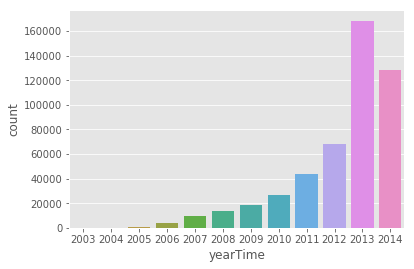

In [6]:
# Show number of reviews of healthy products for 'Grocery & Gourmet Food' over time
sb.countplot(x='yearTime', data=healthy_food_df)

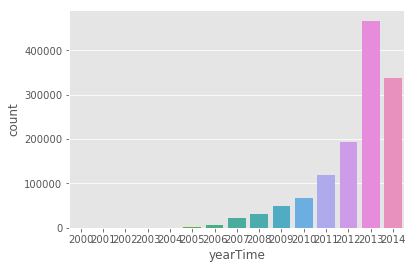

In [7]:
# Show number of reviews for 'Grocery & Gourmet Food' over time
sb.countplot(x='yearTime', data=food_reviews_df)

As we can see, it is not possible to define if healthy products are being reviewed more than other categories with the number of reviews only.

Same for the Sports category

In [ ]:
'''
# Show number of reviews of healthy products for 'Sports & Outdoors' over time
sb.countplot(x='yearTime', data=merged_sport_healthy_df)
'''

In [ ]:
'''
# Show number of reviews for 'Sports & Outdoors' over time
sb.countplot(x='yearTime', data=reviews_sport_df)
'''

## Plan of future milestones

### Plan for milestone 3

|Week|Expected task|
|---|---|
|Week 1| Setup the server with a MongoDB instance and a NodeJS server, retrieve the data, filter it and insert it into the database
|Week 2| Come up with a clever way of defining the "hype" factor and the sentiment analysis labeling (by either using a platform like Google Machine learning API or by creating our own neural network model).
|Week 3 - 4| Answer the research questions defined before. Assigning the "hype" factor to cateories of products and forecasting it over the upcoming years.

### Plan of the presentation